In [1]:
import pandas as pd
import typing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import patsy
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats

%matplotlib inline

In [5]:
auto_df = pd.read_csv('Auto.csv')
# auto_df = pd.read_csv('./list_2/ex_2/Auto.csv')
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Fixing dataset errors

In [6]:
auto_df = auto_df[auto_df['horsepower'] != '?']
auto_df = auto_df.astype({'horsepower':float})

In [7]:
def create_dummy_variable(dataframe, column):
    try:
        dummy_encoding = pd.get_dummies(dataframe[column], prefix=column)
        dataframe.drop(column, axis=1, inplace=True)
        dataframe = pd.concat([dataframe, dummy_encoding], axis=1)
    except KeyError as e:
        print(f"Column '{column}' not found!")
    return dataframe

auto_df = create_dummy_variable(auto_df, 'origin')

## Linear Regression (Part I)

# F-statistic 
Perform check on all betas at once - when it's close to 1 we cannot reject hyptohesis 


Look for at least 1 connected


# TODO

In [13]:
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,1,0,0
393,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,0,1,0
394,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,1,0,0
395,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,1,0,0


In [10]:
features = ['horsepower']
response = ['mpg']

X = auto_df[features]
y = auto_df[response]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              572.4
Date:                Fri, 06 Dec 2019   Prob (F-statistic):                    1.43e-72
Time:                        11:55:59   Log-Likelihood:                         -1287.3
No. Observations:                 313   AIC:                                      2577.
Df Residuals:                     312   BIC:                                      2580.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower     0.1799      0.008     23.926      0.000       0.165       0.195
==============================================================================
Omnibus:                       13.778   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.160
Skew:                          -0.231   Prob(JB):                       0.0169
Kurtosis:                       2.358   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8f2448a50>,
      dtype=object)

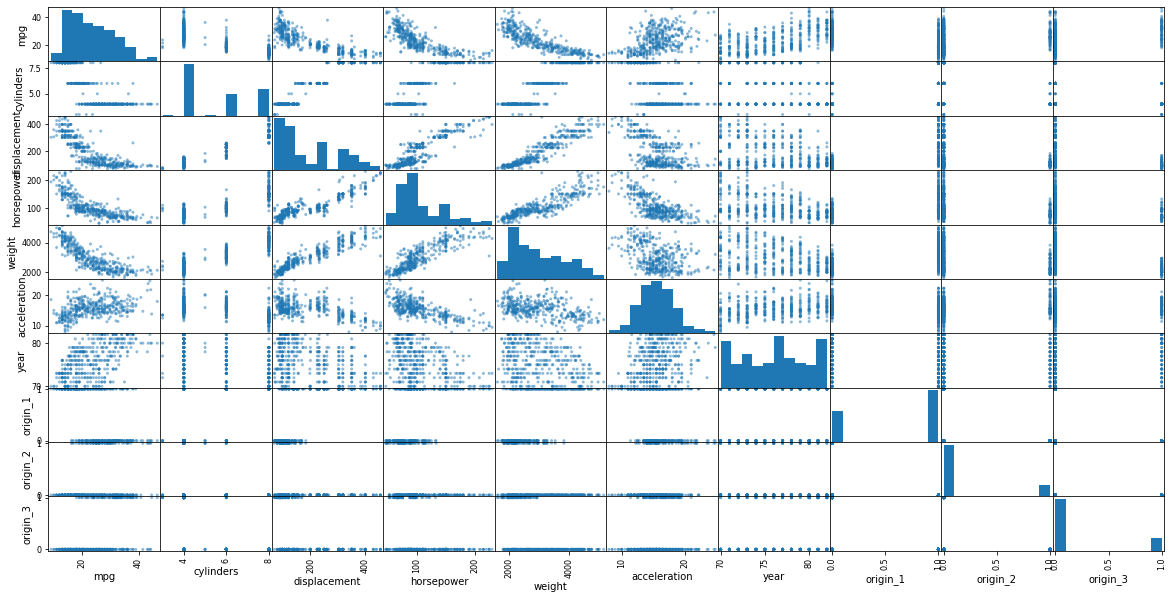

In [14]:
# numeric_df = auto_df.drop('name', axis=1)
# sns.pairplot(numeric_df)
plt.rcParams["figure.figsize"] = [20, 10]
pd.plotting.scatter_matrix(auto_df)

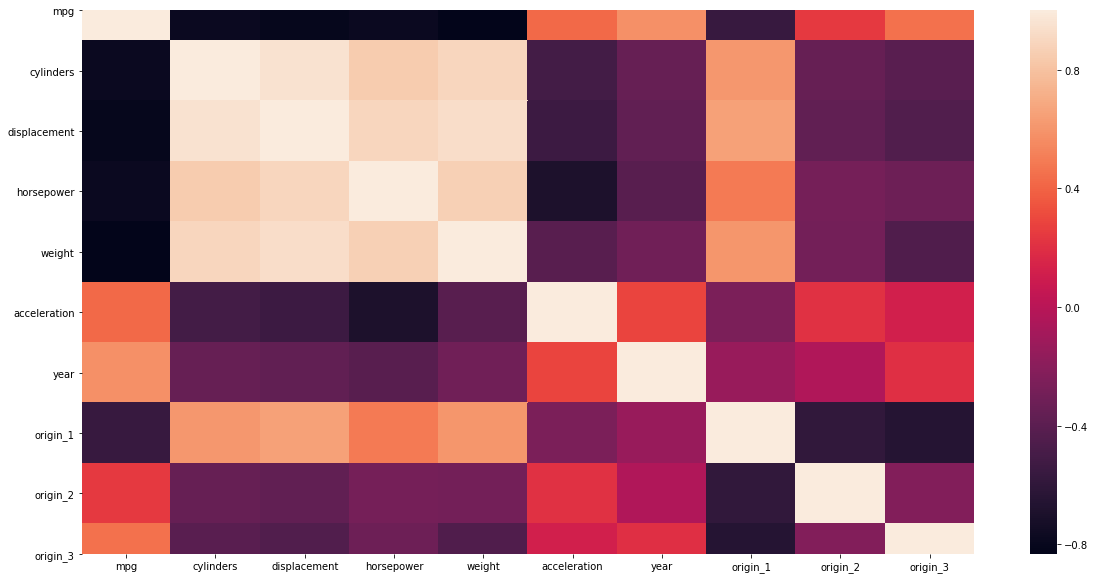

In [15]:
corr_mat = auto_df.corr()
sns.heatmap(corr_mat)

## c) Linear Regression (Part II)

In [16]:
numeric_features = list(auto_df.columns)
numeric_features.remove('mpg')
numeric_features.remove('name')
response = ['mpg']

X = auto_df[numeric_features]
y = auto_df[response]

In [17]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              572.4
Date:                Fri, 06 Dec 2019   Prob (F-statistic):                    1.43e-72
Time:                        12:00:06   Log-Likelihood:                         -1287.3
No. Observations:                 313   AIC:                                      2577.
Df Residuals:                     312   BIC:                                      2580.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower     0.1799      0.008     23.926      0.000       0.165       0.195
==============================================================================
Omnibus:                       13.778   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.160
Skew:                          -0.231   Prob(JB):                       0.0169
Kurtosis:                       2.358   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Try defining different models with patsy library, use symbols +, *, : and different transformations of the variables like for exampleI(np.log(X))orI(np.sqrt(X)). Forwhich model you get the best generalization error?

In [18]:
numeric_columns = list(auto_df.columns)
numeric_columns.remove('name')

In [19]:
def perform_prediction_with_formula(formula, data):
    model = ols(formula=formula, data=data)
    return model.fit()

In [46]:
mask = np.random.rand(len(auto_df)) < 0.8
train = auto_df[mask]
valid = auto_df[~mask]

result_1 = perform_prediction_with_formula('mpg ~ horsepower', train[numeric_columns])
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     499.4
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           7.15e-68
Time:                        12:11:16   Log-Likelihood:                -983.74
No. Observations:                 330   AIC:                             1971.
Df Residuals:                     328   BIC:                             1979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.2606      0.750     52.339      0.000      37.785      40.736
horsepower    -0.1510      0.007    -22.346      0.000      -0.164      -0.138
==============================================================================
Omnibus:                       13.130   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.770
Skew:                           0.498   Prob(JB):                      0.00102
Kurtosis:                       3.094   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
result_2 = perform_prediction_with_formula('mpg ~ I(np.log(horsepower) + weight) + cylinders + year', train[numeric_columns])
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     483.9
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          1.12e-119
Time:                        12:11:20   Log-Likelihood:                -856.55
No. Observations:                 330   AIC:                             1721.
Df Residuals:                     326   BIC:                             1736.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -11.6902      4.191     -2.789      0.006     -19.935      -3.446
I(np.log(horsepower) + weight)    -0.0063      0.000    -12.851      0.000      -0.007      -0.005
cylinders                         -0.1958      0.249     -0.786      0.432      -0.686       0.294
year                               0.7207      0.052     13.899      0.000       0.619       0.823
==============================================================================
Omnibus:                       22.643   Durbin-Watson:                   1.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.217
Skew:                           0.523   Prob(JB):                     2.74e-07
Kurtosis:                       4.051   Cond. No.                     7.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
result_3 = perform_prediction_with_formula('mpg ~ cylinders * displacement * horsepower + year', train[numeric_columns])
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     228.1
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          1.64e-127
Time:                        12:11:22   Log-Likelihood:                -822.93
No. Observations:                 330   AIC:                             1664.
Df Residuals:                     321   BIC:                             1698.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            18.3182     10.544      1.737      0.083      -2.426      39.062
cylinders                            -3.4055      1.872     -1.819      0.070      -7.088       0.277
displacement                         -0.2577      0.070     -3.670      0.000      -0.396      -0.120
cylinders:displacement                0.0227      0.010      2.341      0.020       0.004       0.042
horsepower                           -0.3831      0.099     -3.881      0.000      -0.577      -0.189
cylinders:horsepower                  0.0288      0.016      1.749      0.081      -0.004       0.061
displacement:horsepower               0.0019      0.001      2.647      0.009       0.000       0.003
cylinders:displacement:horsepower    -0.0002   9.39e-05     -1.984      0.048      -0.000    -1.6e-06
year                                  0.6922      0.049     14.250      0.000       0.597       0.788
==============================================================================
Omnibus:                       17.524   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.009
Skew:                           0.413   Prob(JB):                     6.12e-06
Kurtosis:                       4.031   Cond. No.                     1.63e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
models_mse = pd.DataFrame({'Model 1': [result_1.mse_model], 'Model 2': [result_2.mse_model], 'Model 3': [result_3.mse_model]}, index=['Initial dataset'])
models_mse

,Model 1,Model 2,Model 3
Initial dataset,11425.476932,5152.832898,2012.312797


In [51]:
X_valid = auto_df[numeric_features]
y_valid = auto_df['mpg']

In [53]:
from sklearn import metrics
result_1_y_valid_pred = result_1.predict(X_valid)
result_2_y_valid_pred = result_2.predict(X_valid)
result_3_y_valid_pred = result_3.predict(X_valid)

print(f'MSE_Test 1: {metrics.mean_squared_error(y_valid, result_1_y_valid_pred)}\n')
print(f'MSE_Test 2: {metrics.mean_squared_error(y_valid, result_2_y_valid_pred)}\n')
print(f'MSE_Test 3: {metrics.mean_squared_error(y_valid, result_3_y_valid_pred)}\n')


MSE_Test 1: 24.01576417997962

MSE_Test 2: 11.673025709845412

MSE_Test 3: 9.593692421562485



# Outliers and High Leverage Points

Outlier - a data point whose response y does not follow the general trend of
the rest of the data.

High Leverage Point - a data point has high leverage if it has ”extreme” predictor x values.

In [24]:
numeric_df = auto_df[numeric_columns]

def compute_z_score(dataframe):
    return (np.abs(stats.zscore(dataframe)))

a = compute_z_score(numeric_df)
no_outliers = numeric_df[(compute_z_score(numeric_df) < 3).all(axis=1)]

In [25]:
no_outliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
391,27.0,4,151.0,90.0,2950,17.3,82,1,0,0
392,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
395,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [26]:
result_1 = perform_prediction_with_formula('mpg ~ horsepower', no_outliers[numeric_columns])
result_2 = perform_prediction_with_formula('mpg ~ I(np.log(horsepower) + weight) + cylinders + year', no_outliers[numeric_columns])
result_3 = perform_prediction_with_formula('mpg ~ cylinders * displacement * horsepower + weight - acceleration + year + origin_1 + origin_2 + origin_3', no_outliers[numeric_columns])

In [27]:
no_outliers_models_mse = pd.DataFrame({'Model 1': [result_1.mse_model], 'Model 2': [result_2.mse_model], 'Model 3': [result_3.mse_model]}, index=['No outliers dataset'])
models_mse.append(no_outliers_models_mse)

,Model 1,Model 2,Model 3
Initial dataset,14433.077597,6418.517232,1871.662418
No outliers dataset,14229.566372,6187.635104,1797.770667


Model error is smaller in case of deletion of high leverage points